In [1]:
import numpy as np

In [2]:
values = np.loadtxt('http://people.bu.edu/kalathur/datasets/DJI_2018_values.txt')
dates = np.loadtxt('http://people.bu.edu/kalathur/datasets/DJI_2018_dates.txt', dtype='str')

In [3]:
from datetime import datetime
import calendar

In [4]:
def datestr2num(s):
   return datetime.strptime(s, "%m/%d/%y").date()

In [5]:
dates_format= [datestr2num(date) for date in dates]

In [6]:
###Q1
for i in range(5):
    print("Date: ", dates_format[i], " Value: ", values[i])

Date:  2018-01-02  Value:  24824.0
Date:  2018-01-03  Value:  24922.0
Date:  2018-01-04  Value:  25075.0
Date:  2018-01-05  Value:  25295.0
Date:  2018-01-08  Value:  25283.0


In [7]:
###Q2
print("Min Value:", np.min(values), " Date: ", dates_format[np.argmin(values)] )
print("Max Value:", np.max(values), " Date: ", dates_format[np.argmax(values)] )

Min Value: 21792.0  Date:  2018-12-24
Max Value: 26828.0  Date:  2018-10-03


In [8]:
###Q3
diff = np.diff(values)
print("max gain is " ,np.max(diff),\
    "max gain happened on", dates_format[1:][np.argmax(diff)])
print("max loss is " ,np.min(diff),\
    "max loss happened on", dates_format[1:][np.argmin(diff)])

max gain is  1086.0 max gain happened on 2018-12-26
max loss is  -1175.0 max loss happened on 2018-02-05


In [9]:
###Q4
gain_500 = diff[diff>=500]

for i in range (len(gain_500)):
    print("Gain Value: ", gain_500[i],\
          "Date Value: ", values[np.where(diff == gain_500[i])[0][0]+1],\
          " Previous Value : ", values[np.where(diff == gain_500[i])[0][0]],\
          "Date: ", dates_format[np.where(diff == gain_500[i])[0][0]+1],\
          " Previous Date: ", dates_format[np.where(diff == gain_500[i])[0][0]])

Gain Value:  567.0 Date Value:  24912.0  Previous Value :  24345.0 Date:  2018-02-06  Previous Date:  2018-02-05
Gain Value:  669.0 Date Value:  24202.0  Previous Value :  23533.0 Date:  2018-03-26  Previous Date:  2018-03-23
Gain Value:  548.0 Date Value:  25798.0  Previous Value :  25250.0 Date:  2018-10-16  Previous Date:  2018-10-15
Gain Value:  545.0 Date Value:  26180.0  Previous Value :  25635.0 Date:  2018-11-07  Previous Date:  2018-11-06
Gain Value:  618.0 Date Value:  25366.0  Previous Value :  24748.0 Date:  2018-11-28  Previous Date:  2018-11-27
Gain Value:  1086.0 Date Value:  22878.0  Previous Value :  21792.0 Date:  2018-12-26  Previous Date:  2018-12-24


In [10]:
###Q5
np.random.seed(6805)
selected=int(np.random.randint(0, len(dates_format), 1))
if (selected> (len(dates_format)-11)):
    selected= (len(dates_format)-11)
selected_consecutive_dates = np.array(dates_format)[range(selected, (selected+10))]
selected_consecutive_values= np.array(values)[range(selected, (selected+10))]

print("Date: ", selected_consecutive_dates[0],\
         " Value: ", selected_consecutive_values[0],\
         "Gain/Loss", 0)
for i in range(1,9):
    print("Date: ", selected_consecutive_dates[i],\
         " Value: ", selected_consecutive_values[i],\
         "Gain/Loss", np.diff(selected_consecutive_values)[i])
print("Over all gain/loss: ", np.sum(np.diff(selected_consecutive_values)))

Date:  2018-12-04  Value:  25027.0 Gain/Loss 0
Date:  2018-12-06  Value:  24947.0 Gain/Loss -559.0
Date:  2018-12-07  Value:  24388.0 Gain/Loss 35.0
Date:  2018-12-10  Value:  24423.0 Gain/Loss -53.0
Date:  2018-12-11  Value:  24370.0 Gain/Loss 157.0
Date:  2018-12-12  Value:  24527.0 Gain/Loss 70.0
Date:  2018-12-13  Value:  24597.0 Gain/Loss -497.0
Date:  2018-12-14  Value:  24100.0 Gain/Loss -508.0
Date:  2018-12-17  Value:  23592.0 Gain/Loss 83.0
Over all gain/loss:  -1352.0


In [11]:
###Q6
np.random.seed(6805)
selected_dates= np.array(dates_format)[np.sort(np.random.randint(0, len(dates_format), 10))]
selected_values= np.array(values)[np.sort(np.random.randint(0, len(dates_format), 10))]
for i in range(len(selected_dates)):
    print("Date: ",selected_dates[i], " Value: ", selected_values[i] )

Date:  2018-05-01  Value:  25295.0
Date:  2018-05-30  Value:  26076.0
Date:  2018-06-27  Value:  25709.0
Date:  2018-07-19  Value:  24189.0
Date:  2018-07-24  Value:  24462.0
Date:  2018-08-10  Value:  25013.0
Date:  2018-09-14  Value:  25598.0
Date:  2018-09-18  Value:  25366.0
Date:  2018-11-29  Value:  25027.0
Date:  2018-12-04  Value:  24947.0


In [12]:
###Q6
gains_loss = np.zeros(len(selected_dates))
date_index = np.zeros(len(selected_dates))
date_index[len(selected_dates)-1]=len(selected_dates)-1

for i in range (len(selected_dates)-1):
    gain= -1000000000
    index= 0
    for j in range (i,len(selected_dates)-1):
        if (selected_values[j+1]-selected_values[i]> gain):
            gain=selected_values[j+1]-selected_values[i]
            index= j+1
    gains_loss[i]= gain
    date_index[i]= index

for i in range(len(selected_dates)):
    print("Date: ",selected_dates[i], " Value: ", selected_values[i],\
          " Selected date to sell: ", selected_dates[int(date_index[i])],\
         " Gain/Loss on sell: ", gains_loss[i])
print("Over all gain/loss: ", np.sum(gains_loss))

Date:  2018-05-01  Value:  25295.0  Selected date to sell:  2018-05-30  Gain/Loss on sell:  781.0
Date:  2018-05-30  Value:  26076.0  Selected date to sell:  2018-06-27  Gain/Loss on sell:  -367.0
Date:  2018-06-27  Value:  25709.0  Selected date to sell:  2018-09-14  Gain/Loss on sell:  -111.0
Date:  2018-07-19  Value:  24189.0  Selected date to sell:  2018-09-14  Gain/Loss on sell:  1409.0
Date:  2018-07-24  Value:  24462.0  Selected date to sell:  2018-09-14  Gain/Loss on sell:  1136.0
Date:  2018-08-10  Value:  25013.0  Selected date to sell:  2018-09-14  Gain/Loss on sell:  585.0
Date:  2018-09-14  Value:  25598.0  Selected date to sell:  2018-09-18  Gain/Loss on sell:  -232.0
Date:  2018-09-18  Value:  25366.0  Selected date to sell:  2018-11-29  Gain/Loss on sell:  -339.0
Date:  2018-11-29  Value:  25027.0  Selected date to sell:  2018-12-04  Gain/Loss on sell:  -80.0
Date:  2018-12-04  Value:  24947.0  Selected date to sell:  2018-12-04  Gain/Loss on sell:  0.0
Over all gain/lo

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

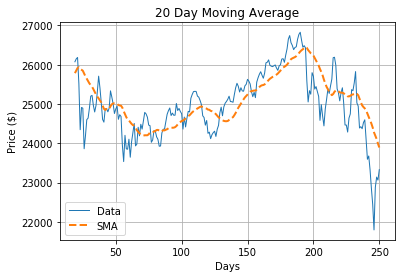

In [14]:
###Q7
N = 20
weights = np.ones(N)/N
sma = np.convolve(values, weights)[N-1:-(N-1)]
t = np.arange(N - 1, len(values))

plt.plot(t, values[N-1:], lw=1.0, label="Data")

plt.plot(t, sma, '--', lw=2.0, label="SMA")

plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

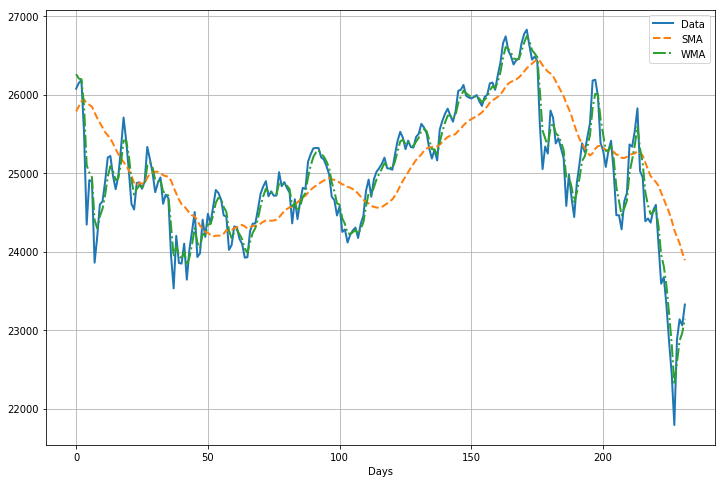

In [15]:
###Q8
N = 20
weights = np.power([2]*20,range(20))
wma = (np.convolve(values, weights[::-1])[N-1:-(N-1)])/sum(weights)
fig, ax = plt.subplots(1, figsize=(12,8))

t1 = np.arange(0, len(values) - N + 1)

plt.plot(t1, values[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")

plt.plot(t1, wma, '-.', lw=2.0, label="WMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()


In [16]:
###Q9
print(np.count_nonzero(wma>sma))

117
